In [2]:
import numpy as np
import os
import glob
import allantools
import matplotlib.pyplot as plt
from tqdm import tqdm

import counts_statistics_qpe as cs
import phase_estimation_functions as qpe
import verification_functions as verif
from densitymatrix import DM

# import numdifftools as nd
# import numpy.linalg as lg
# import scipy.optimize as sp

In [ ]:
####################### VERIFICATION ANALYSIS #################
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification"
#filenames = ["COMPLETE_QPE_FIRST_RUN", "COMPLETE_QPE_SECOND_RUN", "COMPLETE_QPE_THIRD_RUN", "COMPLETE_QPE_FOURTH_RUN", "COMPLETE_QPE_FIFTH_RUN", "COMPLETE_QPE_SIXTH_RUN"]
#filenames = ["COMPLETE_QPE_BELL_FIRST_RUN_20250129175719","COMPLETE_QPE_BELL_SECOND_RUN_20250129230913","COMPLETE_QPE_BELL_THIRD_RUN_20250203010747"]
filenames = [i for i in glob.glob("COMPLETE_*")]
os.chdir(data_dir)
n_qubits = 4
input_state = "Bell" #"Bell" or "GHZ" # This will specify in which folder we want to save the figures

In [3]:
"""
Reading and analysing the stats files
"""
# n_rounds=30
# stats = {}

# for file in filenames:
#     stats[file] = []
#     for i in range(n_rounds):
#         stats_dir = f"{data_dir}\{file}\statistics\\v_round={i}"
#         stats[file].append(cs.Read_Operator_Statistics(stats_dir))

'\nReading and analysing the stats files\n'

In [4]:
"""
GENERATING THE DATA FOR THE ALLAN DEVIATION
"""
# def write_stats(contents, filelabels):
#     for content, filelabel in zip(contents, filelabels):
#         f = open(f"{writting_dir}\\{filelabel}.txt", "w")
#         f.write(str(content))
#         f.close()

# for index, file in enumerate(filenames):
#     v = 1 - 2*final_p_fail_mean[index]
#     meas_stats = stats_list[index]

#     estimator_evol = []
#     n_samples_evol = []

#     ##### Theta estimation and saving params in dictionary #####
#     x0 = np.array([np.pi/8, np.pi/8, np.pi/8, np.pi/8])
#     mle = qpe.Estimator(meas_stats, x0, "visibility", v)
    
#     for j in range(5):
#         n_samples_evol.append(j)
        
#         estimation_results = mle.get_theta(get_cov = False, set_lim = j).x
#         estimator_evol.append(np.sum(estimation_results))

#     writting_dir = f"{data_dir}\{file}\estimation_stats_trial"
#     os.makedirs(f"{writting_dir}", exist_ok=True)

#     filelabels = ["theta_mle", "n_samples"]
#     contents = [estimator_evol, n_samples_evol]
#     write_stats(contents, filelabels)

'\nGENERATING THE DATA FOR THE ALLAN DEVIATION\n'

In [8]:
"""
Reading and analysing the stats files
"""
n_rounds=30
qtys = ["n_samples", "n_samples_error", "p_pass", "p_pass_error"]
samples_evolution = np.arange(1, 1e4, 1)
p_fail_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))
p_fail_error_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))

for index, file in enumerate(filenames):
    for i in tqdm(range(n_rounds)):
        stats_dir = f"{data_dir}\{file}\stats_verif_bottom\\v_round={i}"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
        p_fail_evolution[index][i] = 1 - np.array(p_pass_list, dtype=float)
        p_fail_error_evolution[index][i] = np.array(p_pass_error_list, dtype=float)

100%|██████████| 30/30 [00:01<00:00, 15.68it/s]


In [9]:
##### Get data from the verification #####
final_p_fail_max = []
final_p_fail_mean = []
final_p_fail_mean_error = []

significance_data = []
lamb = 1/2
delta = 0.01
final_epsilons = []

for index, file in enumerate(filenames):
    final_p_fail_max.append(np.round(np.max(p_fail_evolution[index], axis = 0)[-1], 4))
    final_p_fail_mean.append(np.round(np.average(p_fail_evolution[index], axis = 0)[-1], 4))
    final_p_fail_mean_error.append(np.round(np.sqrt(np.sum(p_fail_error_evolution[index]**2, axis = 0)[-1])/30, 4))

    epsilon = np.round(verif.get_epsilon(lamb, delta, 1e4, final_p_fail_max[index], 0.06).x[0], 4)
    final_epsilons.append(epsilon)

final_p_fail_mean = np.array(final_p_fail_mean, dtype = float)
final_p_fail_error_mean = np.array(final_p_fail_mean_error, dtype = float)
print(f"Max value of final failure rate (over all 30 rounds), for each combination of angles: \n{final_p_fail_max}")
print(f"Mean value of final failure rate (over all 30 rounds), for each combination of angles: \n{final_p_fail_mean}")
print(f"Max value of epsilon (over all 30 rounds), for each combination of angles: \n{final_epsilons}")

Max value of final failure rate (over all 30 rounds), for each combination of angles: 
[0.0132, 0.012, 0.0342]
Mean value of final failure rate (over all 30 rounds), for each combination of angles: 
[0.0074 0.0079 0.0173]
Max value of epsilon (over all 30 rounds), for each combination of angles: 
[0.0386, 0.008, 0.06]


c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\verification_functions.py:15: RuntimeWarning: divide by zero encountered in divide
  return (k / (N * nu * epsilon)) * (lamb * np.sqrt(2 * nu) + 1) - lamb * np.sqrt(2 * nu)
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\verification_functions.py:31: RuntimeWarning: divide by zero encountered in divide
  N_min = ((np.log(1/delta) + 4*lamb*nu**2)/epsilon)*((lamb*np.sqrt(2*nu) + r)/(lamb*nu*(1 - r)))**2
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\verification_functions.py:31: RuntimeWarning: invalid value encountered in divide
  N_min = ((np.log(1/delta) + 4*lamb*nu**2)/epsilon)*((lamb*np.sqrt(2*nu) + r)/(lamb*nu*(1 - r)))**2


In [16]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
stabilizers = ["xxxx"]
stab_sign = [1]

final_p_fail_mean_bottom = [0.0114, 0.0116, 0.0259]
final_p_fail_mean_top = [0.0074, 0.0079, 0.0173]

input_state = "Bell" # or GHZ # This will specify in which folder we want to save the figures
n_rounds = 30
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = {"file_1":{}, "file_2":{}, "file_3":{}}

p_pass = np.zeros((2, len(filenames), n_rounds))
p_pass_error = np.zeros((2, len(filenames), n_rounds))

for index, file in enumerate(filenames):    
    # pair = 0 refers to top pair and pair = 1 refers to bottom pair
    for pair in range(2):
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        file_dir = f"{data_dir}\{file}\counts"
        os.chdir(file_dir)

        files = [i for i in glob.glob("Phase*.txt")]
        ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
        files.sort(key = lambda x: int((x.split("_")[2]).split(".")[0]))

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir, input_state, str(pair)) #Set_loops = 1?
        stats_list[f"file_{index+1}"][pair] = stats

        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
        
        p_pass[pair][index] = np.array(p_pass_list, dtype = float)
        p_pass_error[pair][index] = np.array(stats.p_pass_error_list, dtype = float)
    
p_fail = 1 - p_pass
p_fail_error = p_pass_error

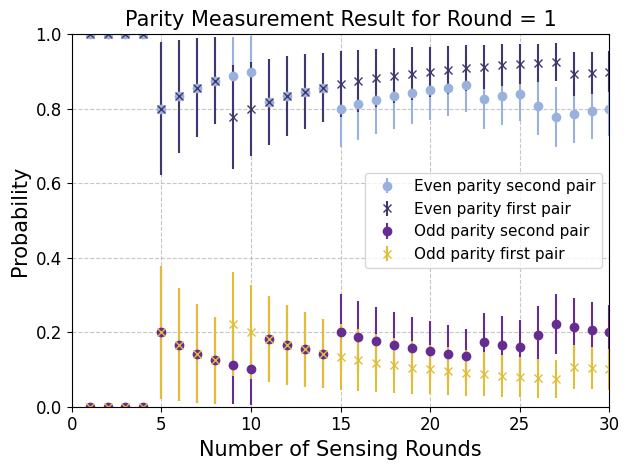

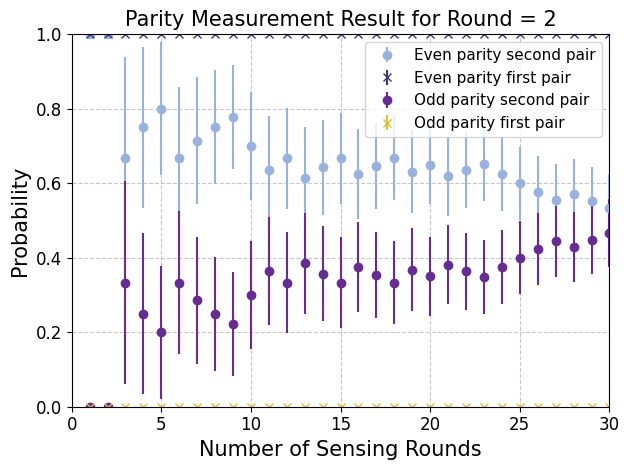

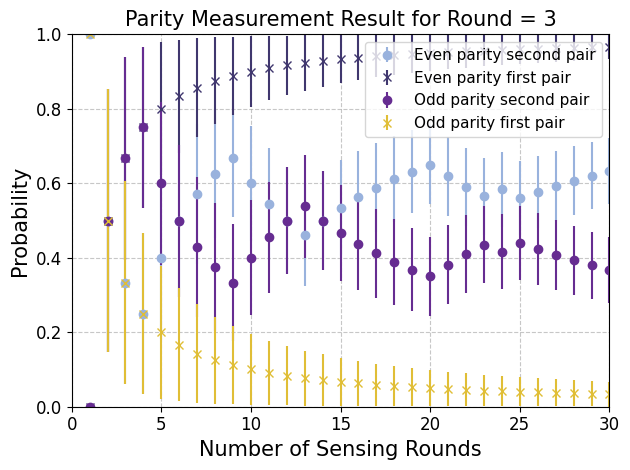

In [17]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_pass[0][index], p_pass_error[0][index], color=colors[0], fmt='o', label = "Even parity second pair")
    plt.errorbar(samples_evolution, p_pass[1][index], p_pass_error[1][index], color=colors[2], fmt='x', label = "Even parity first pair")
    plt.errorbar(samples_evolution, p_fail[0][index], p_fail_error[0][index], color=colors[1], fmt='o', label = "Odd parity second pair")
    plt.errorbar(samples_evolution, p_fail[1][index], p_fail_error[1][index], color=colors[3], fmt='x', label = "Odd parity first pair")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0,1)
    plt.xlim(0,30)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification\Parity_Measurement_Graph\Short_sensing_p_evol_r={index+1}")
    plt.show()

In [18]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {0 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                            "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}},
                    "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                            "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}}},
            1 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                        "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}},
                "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                        "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}}}}

def generate_angles_in_radians(n):
    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 1))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = target_sum - angles[0]  # Assurer que la somme soit bien égale à π/2

        x.append([a1, a2])
    return x

def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True, set_lim = None).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)
    for i in range(2):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/n_rounds)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0]), np.array([0, 1])]
bnds = ((-np.pi/2, np.pi/2), (-np.pi/2, np.pi/2))
x0 = generate_angles_in_radians(100)

### Loading the density matrices
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\QST\with_Certification\Run*")]
QST_file = []
for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file.append(glob.glob("QST_*")[0])

density_matrix = {k: {} for k in QST_file}
for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix[str(QST_file[index])][0] = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix[str(QST_file[index])][1] = np.load(g)

# density_matrix_list = []
# for index, file in enumerate(dm_folder):
#     density_matrix = []
#     os.chdir(f'{file}\\{QST_file[index]}')
#     with open('density_TOP.npy','rb') as f:
#         density_matrix.append(np.load(f))
#     with open('density_BOTTOM.npy','rb') as g:
#         density_matrix.append(np.load(g))

#     density_matrix_list.append(density_matrix)
    
bell = (np.array([1,0,0,0])+np.array([0,0,0,1]))/np.sqrt(2)
bellmatrix = np.array(np.outer(bell, np.conjugate(bell)))

for index, file in enumerate(filenames):
    v = np.array([1 - 2*final_p_fail_mean_top[index], 1 - 2*final_p_fail_mean_bottom[index]])
    for i in range(2):
        dm = density_matrix[str(QST_file[index])][i]
        meas_stats = stats_list[f"file_{index+1}"][i]

        ##### Theta estimation and saving params in dictionary #####
        mle[file] = qpe.Estimator(input_state, i, meas_stats, x0, bnds, "visibility", v[i])
        set_estimation_params(mle[file], thetas_mle[i]["v"], index, a_vectors_list)
        mle[file].set_function_type("density_matrix", dm)
        set_estimation_params(mle[file], thetas_mle[i]["dm"], index, a_vectors_list)

c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\python38\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
c:\Users\QILIP6\anaconda3\envs\p

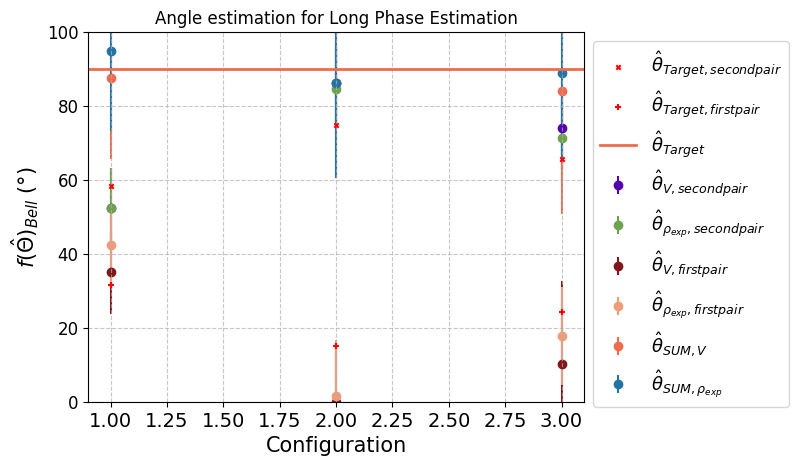

In [19]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"top": [sum(target_angles['RUN_1'][:2])*180/np.pi,
                        sum(target_angles['RUN_2'][:2])*180/np.pi,
                        sum(target_angles['RUN_3'][:2])*180/np.pi],
               "bottom": [sum(target_angles['RUN_1'][-2:])*180/np.pi,
                        sum(target_angles['RUN_2'][-2:])*180/np.pi,
                        sum(target_angles['RUN_3'][-2:])*180/np.pi], 
                "total" :[sum(target_angles['RUN_1'])*180/np.pi,
                        sum(target_angles['RUN_2'])*180/np.pi,
                        sum(target_angles['RUN_3'])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle[0]["v"]["sum"]["values"]*180/np.pi,thetas_mle[0]["v"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[0]["dm"]["sum"]["values"]*180/np.pi,thetas_mle[0]["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.scatter(x_data, target_sums["top"], color='red', s=10, marker="x",label=r"$\hat{\theta}_{Target,second pair}$",zorder=2)

plt.errorbar(x_data, thetas_mle[1]["v"]["sum"]["values"]*180/np.pi,thetas_mle[1]["v"]["sum"]["variance"]*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[1]["dm"]["sum"]["values"]*180/np.pi,thetas_mle[1]["dm"]["sum"]["variance"]*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.scatter(x_data, target_sums["bottom"], color='red', s=20, marker="+",label=r"$\hat{\theta}_{Target,first pair}$",zorder=2)

plt.errorbar(x_data, (thetas_mle[1]["v"]["sum"]["values"]+thetas_mle[0]["v"]["sum"]["values"])*180/np.pi,(thetas_mle[1]["v"]["sum"]["variance"]+thetas_mle[0]["v"]["sum"]["variance"])*180/np.pi, color=colors[0], label = r"$\hat{\theta}_{SUM,V}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle[1]["dm"]["sum"]["values"]+thetas_mle[0]["dm"]["sum"]["values"])*180/np.pi,(thetas_mle[1]["dm"]["sum"]["variance"]+thetas_mle[0]["dm"]["sum"]["variance"])*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\with_Certification\Angle_Short_Phase_Estimation_Bell.pdf", bbox_inches='tight')
plt.show()

In [ ]:
############## Estimation with the maximum likelihood estimator #################
############## Saves the evolution of the estimation ##################
n_samples = {}
theta_mle = {}
theta_mle_error = {}
hessian_matrix = {}
fisher_info = {}
var = {}

def sum_min_bound(x):
    return np.sum(x)

def sum_up_bound(x):
    return np.pi-np.sum(x)
    
cons = [{'type': 'ineq', 'fun': sum_min_bound},
        {'type': 'ineq', 'fun': sum_up_bound}]

for index, file in enumerate(filenames):
    n_samples_evol = []
    theta_mle_evol = []
    theta_mle_error_evol = []
    hessian_matrix_evol = []
    fisher_info_evol = []
    var_evol = []
    
    print(f"Estimating data for {file}")
    v = 1 - final_p_fail_mean[index]

    ### Setting array with measurement results of each sensing rounds. Results are either 0 (odd) or 1 (even)
    meas_results = np.sum((stats_list[index].counts_array*(stats_list[index].eigenvalues + 1)/2), axis = 1)

    for j in range(31):
        ### Setting array with measurement results of each sensing rounds. Results are either 0 (odd) or 1 (even)
        meas_results_cap = meas_results[:j]
        ##### Theta estimation #####
        x0 = np.array([np.pi/8, np.pi/8, np.pi/8, np.pi/8])
        
        constraints = cons
        mle = sp.minimize(qpe.likelihood_function,
                        x0,
                        args = (v, meas_results_cap),
                        method = 'SLSQP',
                        constraints = cons)
        theta_mle_evol.append(np.sum(mle.x))
        n_samples_evol.append(j)
        
        # # ### Setting the frequency of ech measurement result
        f_x0 = stats_list[index].N_pass
        f_x1 = stats_list[index].N_fail
        
        # ### Getting the variancce from a specific python package
        hessian_func = nd.Hessian(qpe.likelihood_function)  # Create a Hessian function
        hessian_scipy = hessian_func(mle.x, v, meas_results)  # Evaluate the Hessian

        a_vector = np.array([1, 1, 1, 1])
        a_vector_norm = np.array([1, 1, 1, 1])/np.linalg.norm(a_vector)

        fisher_bound = a_vector_norm@hessian_scipy@a_vector_norm
        var2_norm = 1/fisher_bound
        var2 = (np.linalg.norm(a_vector)**2)*var2_norm
        var_value = np.sqrt(var2)

        hessian_matrix_evol.append(hessian_scipy)
        fisher_info_evol.append(fisher_bound)
        var_evol.append(var_value)

    theta_mle[file] = np.array(theta_mle_evol)
    hessian_matrix[file] = np.array(hessian_matrix_evol)
    fisher_info[file] = np.array(fisher_info_evol)
    var[file] = np.array(var_evol)
    n_samples[file] = np.array(n_samples_evol)

    # writting_dir = f"{data_dir}\{file}\estimation_stats"
    # os.makedirs(f"{writting_dir}", exist_ok=True)

    # f = open(f"{writting_dir}\\theta_mle.txt", "w")
    # f.write(str(theta_mle_evol)) 
    # f.close()

    # f = open(f"{writting_dir}\\hessian_matrix.txt", "w")
    # f.write(str(hessian_matrix_evol)) 
    # f.close()

    # f = open(f"{writting_dir}\\fisher_info.txt", "w")
    # f.write(str(fisher_info_evol)) 
    # f.close()

    # f = open(f"{writting_dir}\\var.txt", "w")
    # f.write(str(var_evol)) 
    # f.close()

    # f = open(f"{writting_dir}\\n_samples.txt", "w")
    # f.write(str(n_samples_evol)) 
    # f.close()

In [14]:
# ############## Estimation with the inversion of the likelihood function #################
# theta_inverse_list = []
# theta_inv_error_list = []

# hessian_matrix_list = []
# fisher_info_list = []

# x_data = [1, 2, 3, 4, 5, 6]

# for index, file in enumerate(filenames):
#     v = 1 - final_p_fail_mean[index]

#     # Compute inverse probability
#     theta_inverse, theta_inv_error = qpe.get_theta(p_pass[index][-1], v, p_pass_error[index][-1], final_p_fail_error_mean[index])
#     theta_inverse_list.append(theta_inverse)
#     theta_inv_error_list.append(theta_inv_error)

# theta_inverse_all = np.array(theta_inverse_list, dtype = float)

# theta_inv_error_all = np.array(theta_inv_error_list, dtype = float)
# theta_mean = np.average(theta_inverse_all)

# # Plot results
# plt.errorbar(x_data, theta_inverse_all*180/np.pi, theta_inv_error_all*180/np.pi, label="Theta inv", marker='o', linestyle="")

# # plt.axhline(theta_mean*180/np.pi, color='blue', linestyle='--', label=f"Mean theta ({180/np.pi*theta_mean:.2f}°)")
# plt.axhline(np.pi/2*180/np.pi, color='red', linestyle='-', label=f"Target theta")


# plt.xlabel("Round")
# plt.ylabel("Theta (°)")
# plt.ylim(0, 105)
# plt.title("Parameter Estimation")
# plt.legend()
# plt.grid(True)
# plt.show()